In [383]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [384]:
df=pd.read_csv("kidney_disease.csv")
df.head(5)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [385]:
df.shape

(400, 26)

In [386]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [387]:
df.drop("id",axis=1,inplace=True) #as id is inceasing continuosly and no data can be extract from it model ca't get any pattern fromit

In [388]:
df.columns


Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [389]:
df.columns=['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification']


In [390]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [391]:
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [392]:
#from this the conclusion is total rows 400 but from count row  it is concluded that some values are missing.abs
#from 25%,50%,75% we conclude that they are skewed to one value

In [393]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

In [394]:
df['pcv']

0      44
1      38
2      31
3      32
4      35
       ..
395    47
396    54
397    49
398    51
399    53
Name: pcv, Length: 400, dtype: object

In [395]:
df['pcv'].unique() #due to \t43 the data type is object

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '\t?', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', '\t43', '47', '9', '49', '50', '53', '51',
       '54'], dtype=object)

In [396]:
df["pcv"]=pd.to_numeric(df["pcv"],errors='coerce') #coerce means suppress or ignore

In [397]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             329 non-null    float64
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

In [398]:
df["wc"]=pd.to_numeric(df["wc"],errors='coerce') #coerce means suppress or ignore
df["rc"]=pd.to_numeric(df["rc"],errors='coerce')

In [399]:
df.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [400]:
# separate catagorical column and numerical column
cat_col=[cols for cols in df.columns if df[cols].dtype=="object"]
num_col=[cols for cols in df.columns if df[cols].dtype!="object"]

In [401]:
cat_col

['rbc',
 'pc',
 'pcc',
 'ba',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [402]:
num_col

['age',
 'bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc']

In [403]:
for cols in cat_col:
    print(f"{cols} has {df[cols].unique()} values \n")

rbc has [nan 'normal' 'abnormal'] values 

pc has ['normal' 'abnormal' nan] values 

pcc has ['notpresent' 'present' nan] values 

ba has ['notpresent' 'present' nan] values 

htn has ['yes' 'no' nan] values 

dm has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values 

cad has ['no' 'yes' '\tno' nan] values 

appet has ['good' 'poor' nan] values 

pe has ['no' 'yes' nan] values 

ane has ['no' 'yes' nan] values 

classification has ['ckd' 'ckd\t' 'notckd'] values 



In [404]:
#replace unwanted values
df["dm"df["dm"].replace(to_replace={"yes":"yes","no":"no","\tno":"no","\tyes":"yes"},inplace=True)

In [405]:
df["cad"]=df["cad"].replace(to_replace="\tno",value="no")

In [406]:
df['classification'] = df['classification'].replace(to_replace = 'ckd\t', value = 'ckd')

In [407]:
df["classification"].unique()

array(['ckd', 'notckd'], dtype=object)

In [408]:
df["classification"]=df["classification"].map({"ckd":"0","notckd":"1"})

In [409]:
df["classification"].unique()

array(['0', '1'], dtype=object)

In [410]:
for cols in cat_col:
    print(f"{cols} has {df[cols].unique()} values \n")

rbc has [nan 'normal' 'abnormal'] values 

pc has ['normal' 'abnormal' nan] values 

pcc has ['notpresent' 'present' nan] values 

ba has ['notpresent' 'present' nan] values 

htn has ['yes' 'no' nan] values 

dm has [None] values 

cad has ['no' 'yes' nan] values 

appet has ['good' 'poor' nan] values 

pe has ['no' 'yes' nan] values 

ane has ['no' 'yes' nan] values 

classification has ['0' '1'] values 



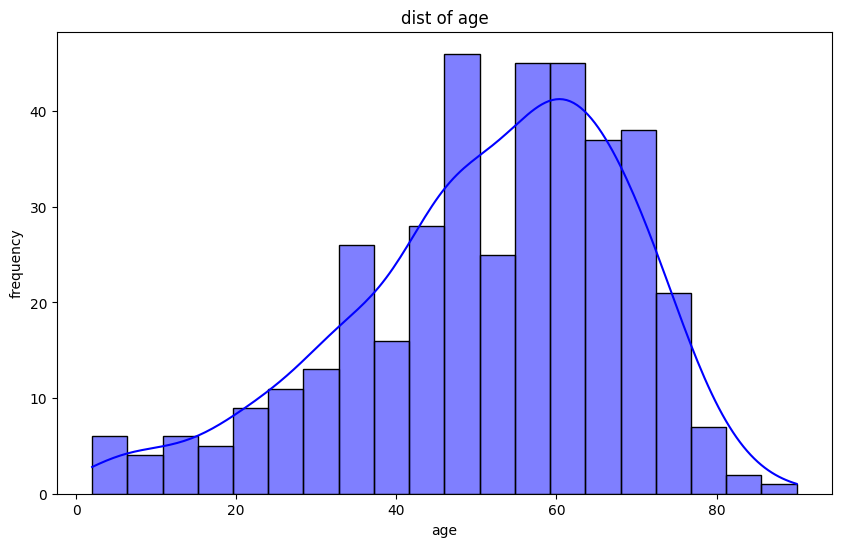

In [411]:
#univariate
plt.figure(figsize=(10,6))
sns.histplot(df["age"].dropna(),kde=True,bins=20,color="b")
plt.title("dist of age")
plt.xlabel("age")
plt.ylabel("frequency")
plt.show()

In [412]:
#insights:--dist of age is left skewed
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

<Axes: xlabel='htn', ylabel='count'>

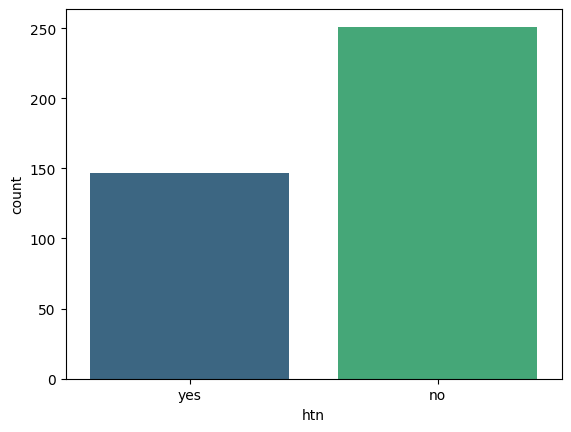

In [413]:
sns.countplot(x = 'htn', data=df, palette = 'viridis')

In [414]:
#150 of them has hypertension

<Axes: xlabel='classification', ylabel='bu'>

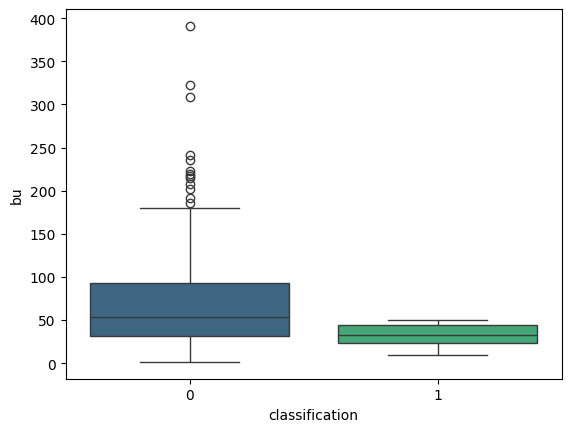

In [415]:
sns.boxplot(x = 'classification', y = 'bu', data=df, palette = 'viridis')

In [416]:
#insights>> people with no kidney disease has higher blood_urea with outliers

<Axes: xlabel='classification', ylabel='sc'>

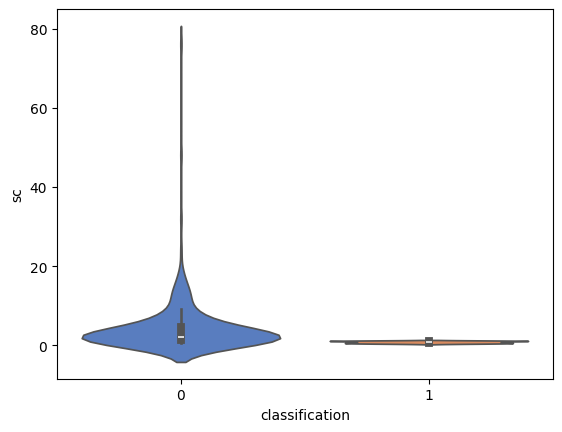

In [417]:
sns.violinplot(x = 'classification', y = 'sc', data=df, palette = 'muted')

In [418]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

<Axes: xlabel='ane', ylabel='count'>

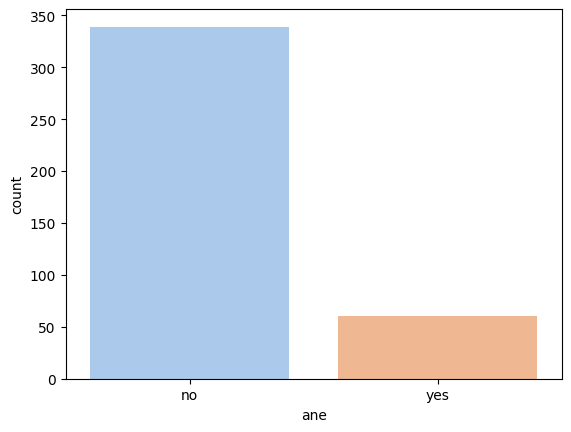

In [419]:
sns.countplot(x = "ane", data=df, palette = 'pastel')

In [420]:
#majority of people not suffering from anaemia

<Axes: ylabel='count'>

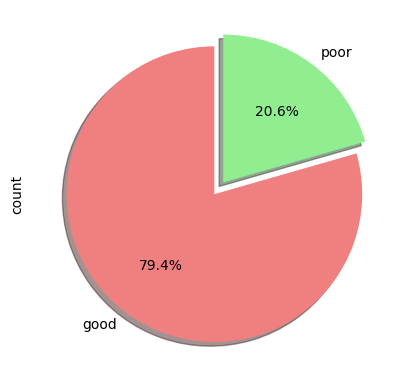

In [421]:

df.appet.value_counts().plot.pie(autopct = '%1.1f%%', colors=["lightcoral", "lightgreen"], explode = (0, 0.1), startangle=90, shadow = True)

In [422]:
df.pcc

0      notpresent
1      notpresent
2      notpresent
3         present
4      notpresent
          ...    
395    notpresent
396    notpresent
397    notpresent
398    notpresent
399    notpresent
Name: pcc, Length: 400, dtype: object

<Axes: xlabel='pcc', ylabel='count'>

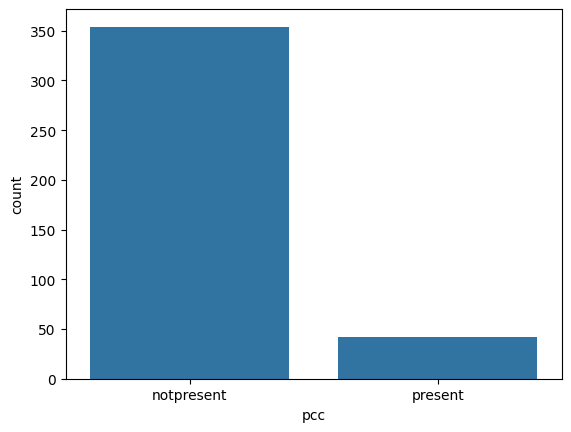

In [423]:
sns.countplot(x = 'pcc', data=df)

<Axes: xlabel='wc', ylabel='Count'>

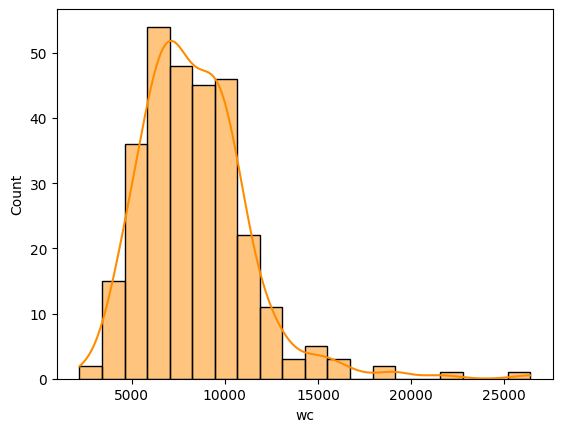

In [424]:
sns.histplot(df['wc'].dropna(), bins = 20, kde = True, color='darkorange')

In [425]:
#donut plot >> donut chart or ring chart. It is essentially a pie chart with a hole in the center
#by specifying wedgeprops value
#used to display proportions

<Axes: ylabel='count'>

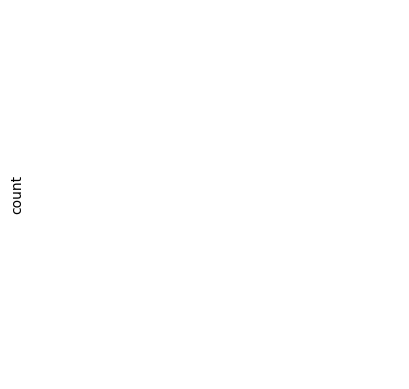

In [426]:
df['dm'].value_counts().plot.pie(autopct = "%1.1f%%", wedgeprops = dict(width = 0.3))

In [427]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

<Axes: xlabel='cad', ylabel='count'>

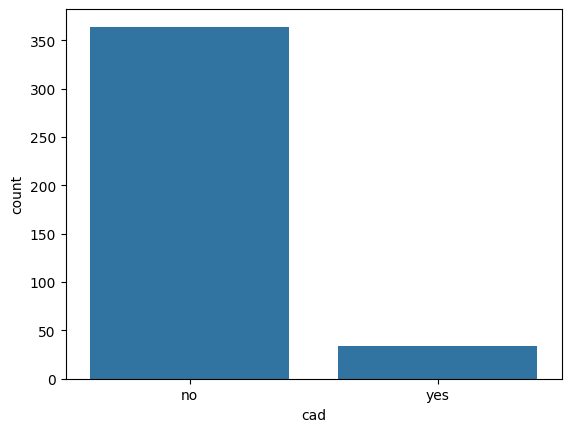

In [428]:
sns.countplot(x = 'cad', data=df)

<Axes: xlabel='pe', ylabel='count'>

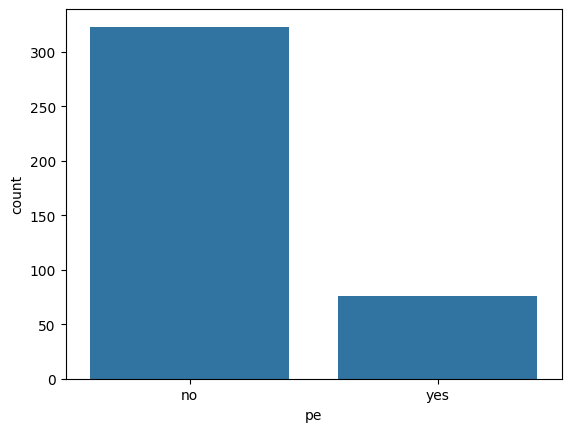

In [429]:
sns.countplot(x = 'pe', data=df)

<Axes: xlabel='ba', ylabel='count'>

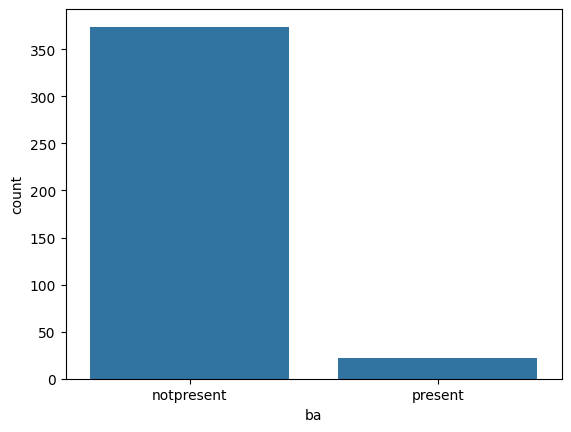

In [430]:
sns.countplot(x = 'ba', data=df)

<Axes: xlabel='age', ylabel='bp'>

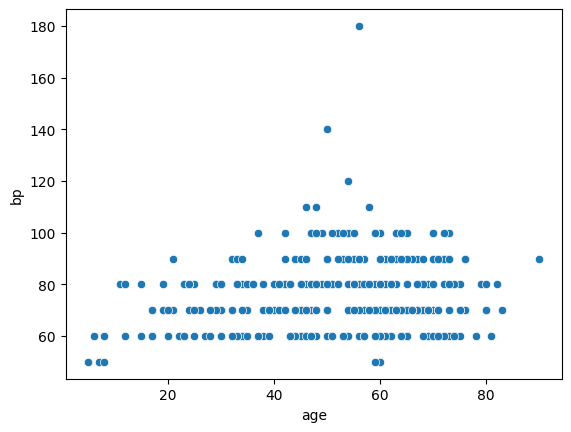

In [431]:
#bivariate analysis
sns.scatterplot(x = 'age', y = 'bp', data=df)

In [432]:
#insights>> age is incresing, bp is also increasing

<Axes: xlabel='age', ylabel='bp'>

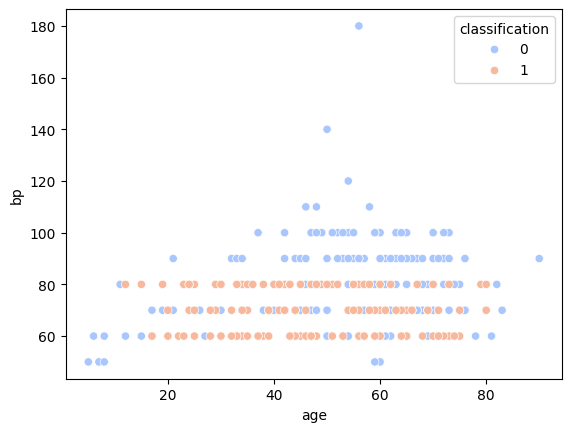

In [433]:
sns.scatterplot(x = 'age', y = 'bp', data=df, hue = 'classification', palette = 'coolwarm')

ValueError: List of boxplot statistics and `positions` values must have same the length

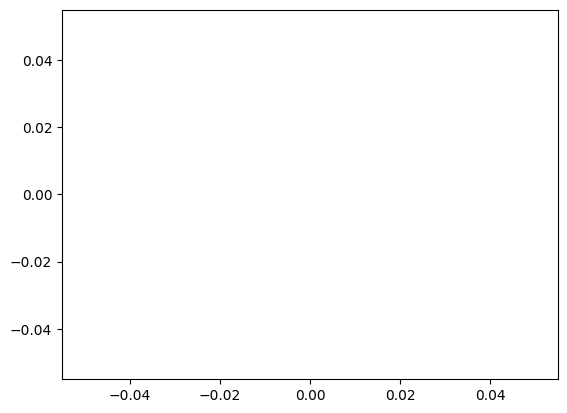

In [434]:
sns.boxplot(x = 'dm', y = 'al', data=df)

In [ ]:
sns.violinplot(x = 'dm', y = 'al', data=df, inner = 'quartile')

In [ ]:
#stacked bar chart>> diabetes_mellitus and hypertension
pd.crosstab(df['dm'], df['htn'])
#crosstab summarises the data


In [ ]:
diabetes_hypertension = pd.crosstab(df['dm'], df['htn'])
diabetes_hypertension.plot(kind = 'bar', stacked = True)

In [ ]:
#multivariate analysis
#customised pariplot 
cols = ['age', 'bp', 'bgr', 'sc', 'classification']
g = sns.PairGrid(df[cols], hue = 'classification', palette = 'coolwarm')
g.map_upper(sns.scatterplot) #upper corner plot
g.map_lower(sns.kdeplot, cmap = 'Blues_d') #diagonal plot
g.map_diag(sns.histplot) #lower corner plot
g.add_legend()
plt.title("Pairgrid for sleected columns")
plt.show()

In [ ]:
sns.pairplot(df[cols], hue = 'classification', palette = 'husl')

In [ ]:
df.corr(numeric_only = True)

In [ ]:
corr = df.corr(numeric_only = True)
plt.figure(figsize = (12, 8))
sns.heatmap(corr, annot=True, cmap = "coolwarm", linewidth = 0.5)

In [ ]:
sns.swarmplot(x = 'dm', y = 'age', hue = 'htn', data=df, palette='pastel', size = 8)

In [ ]:
#swarm plot allows to see all the overlapping data as well

In [ ]:
import plotly.express as px



In [ ]:
df.columns

In [ ]:
fig = px.scatter(df, x = 'age', y = 'bp', color = 'classification', hover_data=['sc', 'hemo'], title = "interactive scatterplot")
fig.show()

In [ ]:
import plotly.graph_objects as go

data_corr = df.corr(numeric_only = True)
fig = go.Figure(data = go.Heatmap(z = data_corr.values, x = data_corr.columns, y = data_corr.index))
fig.show()

In [ ]:
fig = px.scatter_3d(df, x = 'age', y = 'bp', z = 'sc', color = 'hemo', title ="3d scatterplot")
fig.show()


In [ ]:
df.isnull().sum()

In [ ]:
cat_col

In [ ]:
num_col

In [ ]:
#replace with median, mean>> for numerical cols
median_values = df[num_col].median()


In [ ]:
median_values

In [ ]:
df[num_col] = df[num_col].fillna(median_values)

In [ ]:
df[num_col].isna().sum()

In [ ]:
mode_values = df.mode().iloc[0]

In [ ]:
df[cat_col] = df[cat_col].fillna(mode_values)

In [ ]:
df[cat_col].isna().sum()

In [ ]:
df.dtypes

In [ ]:
#few columns are object columns>> convert object to numerical

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in cat_col:
    df[col] = label_encoder.fit_transform(df[col])

In [ ]:
df.head()

In [ ]:
df.dtypes

In [ ]:
X = df.drop('classification', axis = 1)
y = df['classification']

In [ ]:
#train test split and build model